In `statistics` and `applications of statistics`, `normalization` can have a range of meanings. In the simplest cases, `normalization` of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging. In more complicated cases, `normalization` may refer to more sophisticated adjustments where the intention is to bring the entire `probability distributions` of adjusted values into alignment. In the case of `normalization of scores` in educational assessment, there may be an intention to align distributions to a `normal distribution`. A different approach to `normalization` of probability distributions is `quantile normalization`, where the quantiles of the different measures are brought into alignment.

In another usage in statistics, normalization refers to the creation of `shifted and scaled versions` of statistics, where the intention is that these normalized values allow the comparison of corresponding normalized values for different datasets in a way that eliminates the effects of certain `gross influences`, as in an `anomaly time series`. Some types of normalization involve only a `rescaling`, to arrive at values relative to some size variable.


There are different types of normalizations in statistics – 
* `nondimensional ratios of errors`, 
* `residuals`,
* `means and standard deviations`, 

which are hence scale invariant – some of which may be summarized as follows. Note that in terms of levels of measurement, these ratios only make sense for ratio measurements (where ratios of measurements are meaningful), not interval measurements (where only distances are meaningful, but not ratios). 

* **Standard score:**  In statistics, the standard score is the number of standard deviations by which the value of a raw score is above or below the mean value of what is being observed or measured. Raw scores above the mean have positive standard scores, while those below the mean have negative standard scores.

**formula:** 
  <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5fa4ed805c338486b0c852cca4b8e38ee9300870"></a>
  
**Use:** `Normalizing` errors when population parameters are known. Works well for populations that are normally distributed

* **Coefficient of variation:** In `probability theory and statistics`, the coefficient of variation `(CV)`, also known as `relative standard deviation (RSD)`, is a standardized measure of dispersion of a probability distribution or frequency distribution. It is often expressed as a percentage, and is defined as the ratio of the standard deviation  to the mean . The `CV` or `RSD` is widely used in analytical chemistry to express the `precision` and `repeatability` of an assay. It is also commonly used in fields such as `engineering or physics` when doing `quality assurance studies` and `ANOVA gauge R&R`. In addition, CV is utilized by `economists` and `investors` in `economic models`.

**formula:** <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f20a582a0f7465bb7dbfcfaf9b85b28952e794d3"></a>

**Use:** Normalizing dispersion, using the mean 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9fd47b2a39f7a7856952afec1f1db72c67af6161"></a>   as a measure of scale, particularly for positive distribution such as the exponential distribution and Poisson distribution.

* **Min-Max Feature scaling:** `Feature scaling` is a method used to `normalize` the `range of independent variables` or `features of data`. In data processing, it is also known as `data normalization` and is generally performed during the data preprocessing step.

formula: <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0222c9472478eec2857b8bcbfa4148ece4a11b84"></a>






**Use:** Feature scaling is used to bring all values into the range **[0,1]**. This is also called unity-based normalization. This can be generalized to restrict the range of values in the dataset between any arbitrary points **a and b**, using for example  <img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/b77a3ee074440a80695ac0818fa1cb98588ec8b2"></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import Normalizer, normalize

In [33]:
df = pd.read_csv('datasets/diabetes.csv')

df =  df.drop(['Outcome'], axis = 1)

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Normalization

Normalization applies a transformation to each row (sample) in the data so that it fulfils a norm condition. For example, if the value of features in a row are f1, f2, f3...fn then:
* <b>L1 norm:</b> |f1| + |f2| + |f3| ... |fn| = 1
* <b>L2 norm:</b> sqrt(f1<sup>2</sup> + f2<sup>2</sup> + f3<sup>2</sup>...fn<sup>2</sup>) = 1
* <b>Max norm:</b> Each value is expressed as a proportion of a max value in the row

#### L2 norm is the default for the normalize function

In [35]:
l2_normalized_df = pd.DataFrame(normalize(df, norm='l2'), 
                                columns=df.columns)

In [37]:
l2_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [43]:
l2_normalized_df.iloc[2].sum()

1.5703185045820889

#### Square the values in Row 0

In [44]:
l2_normalized_df.iloc[0].pow(2)

Pregnancies                 0.001126
Glucose                     0.684963
BloodPressure               0.162110
SkinThickness               0.038307
Insulin                     0.000000
BMI                         0.035304
DiabetesPedigreeFunction    0.000012
Age                         0.078178
Name: 0, dtype: float64

In [45]:
l2_normalized_df.iloc[0].pow(2).sum()

1.0000000000000002

#### Square root of sum of squares of values in Row 0

In [46]:
math.sqrt(l2_normalized_df.iloc[0].pow(2).sum())

1.0

#### Pick another random row to check square root of sum of squares

In [47]:
math.sqrt(l2_normalized_df.iloc[13].pow(2).sum())

0.9999999999999999

#### Apply L1 norm

In [48]:
l1_normalized_df = pd.DataFrame(normalize(df, norm='l1'), 
                                columns=df.columns)

l1_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.017380,0.428703,0.208558,0.101383,0.000000,0.097327,0.001816,0.144832
1,0.004185,0.355721,0.276207,0.121364,0.000000,0.111320,0.001469,0.129734
2,0.025726,0.588477,0.205806,0.000000,0.000000,0.074926,0.002161,0.102903
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


#### Sum of absolute values should equal 1
In this dataset, all values are positive, so abs() calculation is not required, but included here to illustrate how the L1 norm is calculated

In [49]:
l1_normalized_df.iloc[0].abs().sum()

0.9999999999999998

In [50]:
l1_normalized_df.iloc[31].abs().sum()

1.0

#### Relationships between variables will change after normalization
Scatter plots will look quite different when we plot Insulin levels vs. Glucose readings

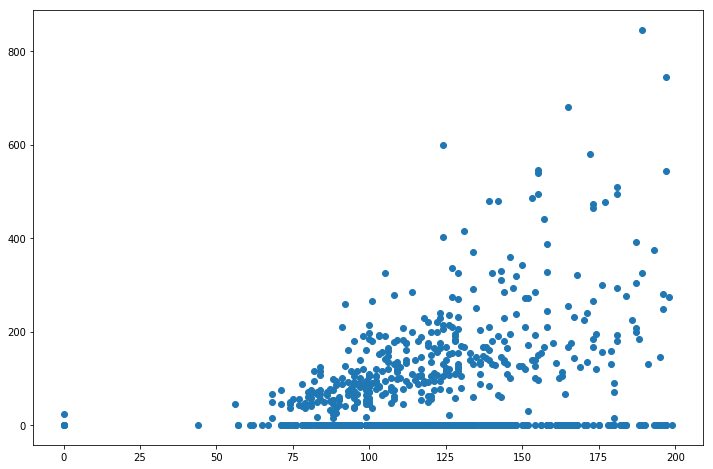

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df['Glucose'], df['Insulin'])

plt.show()

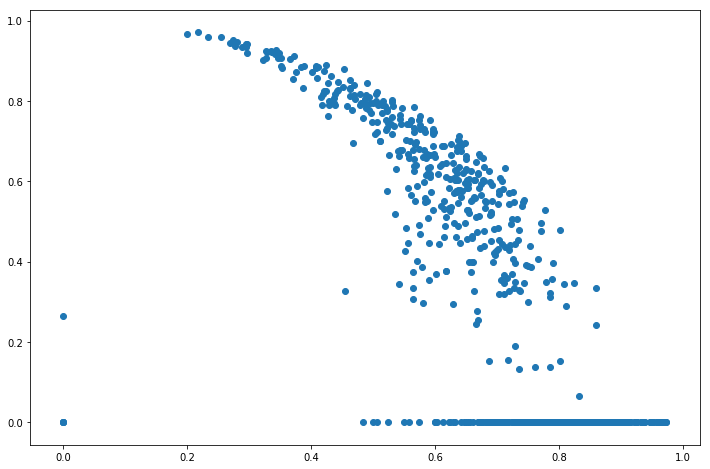

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(l2_normalized_df['Glucose'], 
            l2_normalized_df['Insulin'])

plt.show()

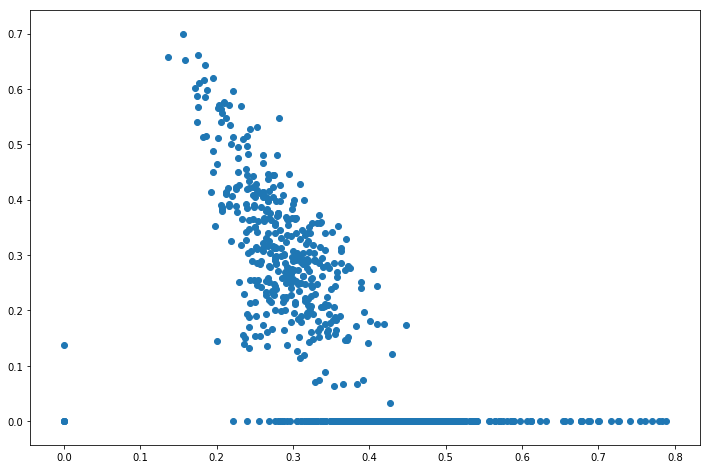

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(l1_normalized_df['Glucose'], 
            l1_normalized_df['Insulin'])

plt.show()

#### Normalization with Max norm
Each value in a row is expressed as a proportion of the max value. Check original values first

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### Max Norm applied
The value for the glucose reading is the highest in the first 3 rows, but Insulin is the max value in the next 2

In [55]:
max_normalized_df = pd.DataFrame(normalize(df, norm='max'), 
                                 columns=(df.columns))

max_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.040541,1.000000,0.486486,0.236486,0.0,0.227027,0.004236,0.337838
1,0.011765,1.000000,0.776471,0.341176,0.0,0.312941,0.004129,0.364706
2,0.043716,1.000000,0.349727,0.000000,0.0,0.127322,0.003672,0.174863
3,0.010638,0.946809,0.702128,0.244681,1.0,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.0,0.256548,0.013619,0.196429


#### Manually perform normalization with max norm for Row 0

In [56]:
df.iloc[0]/df.iloc[0].max()

Pregnancies                 0.040541
Glucose                     1.000000
BloodPressure               0.486486
SkinThickness               0.236486
Insulin                     0.000000
BMI                         0.227027
DiabetesPedigreeFunction    0.004236
Age                         0.337838
Name: 0, dtype: float64

### Cosine Similarity
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.

First examine 3 samples from the dataset. Rows 10 and 11 are quite similar to each other (vary in number of pregnancies and glucose levels). Row 8 is quite different from the other 2

In [57]:
df.iloc[[8, 10, 11]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8,2,197,70,45,543,30.5,0.158,53
10,4,110,92,0,0,37.6,0.191,30
11,10,168,74,0,0,38.0,0.537,34


In [58]:
cosine_similarity(df.iloc[10].values.reshape(1, -1), 
                  df.iloc[11].values.reshape(1, -1))

array([[0.96221582]])

In [59]:
cosine_similarity(df.iloc[8].values.reshape(1, -1), 
                  df.iloc[10].values.reshape(1, -1))

array([[0.34751949]])

In [60]:
cosine_similarity(df.iloc[8].values.reshape(1, -1), 
                  df.iloc[11].values.reshape(1, -1))

array([[0.36851998]])

In [61]:
cosine_similarity(l2_normalized_df.iloc[8].values.reshape(1, -1), 
                  l2_normalized_df.iloc[11].values.reshape(1, -1))

array([[0.36851998]])